In [218]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [103]:
# The starter code is short and simple, take a look!
from starter import *
import random
import numpy
import math
from collections import defaultdict

# Phase 1 - Create Inputs

In [36]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    G.add_nodes_from(range(N_SMALL))
    num_edges = 0
    sum_weight = 500000
    unlucky_nodes = [20, 21, 22]
    while sum_weight >= 0:
        weight = random.randint(0, 1000)
        node1 = random.randint(0, N_SMALL-1)
        node2 = random.randint(0, N_SMALL-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    G.add_nodes_from(range(N_MEDIUM))
    num_edges = 0
    sum_weight = 750000
    unlucky_nodes = [20, 200, 210, 222]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_MEDIUM-1)
        node2 = random.randint(0, N_MEDIUM-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    G.add_nodes_from(range(N_LARGE))
    num_edges = 0
    sum_weight = 1000000
    unlucky_nodes = [i for i in range(N_LARGE) if i % 10 == 2]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_LARGE-1)
        node2 = random.randint(0, N_LARGE-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G

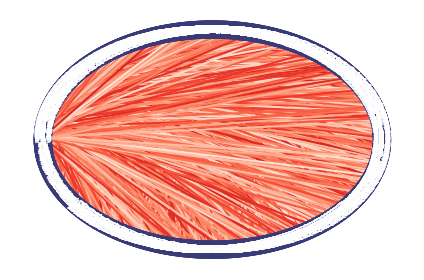

In [41]:
'''G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')
visualize(G)

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')
visualize(G)

'''
G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')
visualize(G)

# Phase 2 - Implement your Solver

In [210]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    def getWeight(pair):
        u,v = pair
        return G[u][v]['weight']
    edges = sorted(list(G.edges), key=getWeight, reverse=False)
    
    best_score = float('inf')
    for k in range(1, len(G.nodes)):
        # start with all penguins in random teams
        prev_G = G.copy()
        for node in G.nodes:
            G.nodes[node]['team'] = node % k + 1
        s = score(G)
        if s < best_score:
            best_score = s
        else: # if increasing the group size no longer helps
            break
    
    for i in range(len(G.nodes)):
        modified = False
        for u, v in edges:
            if G.nodes[u]['team'] == G.nodes[v]['team']:
                old_score = s
                old_team = G.nodes[u]['team']
                new_u_team = old_team + 1 # pick some other team
                new_v_team = old_team + 1

                G.nodes[u]['team'] = new_u_team # u changed
                new_u_score = score(G)
                G.nodes[v]['team'] = new_v_team # u,v changed
                new_uv_score = score(G)
                G.nodes[u]['team'] = old_team # v changed
                new_v_score = score(G)

                # get the minimum score
                s = 0 - max([-old_score, -new_u_score, -new_uv_score, -new_v_score])

                if s == old_score: # neither changes
                    G.nodes[v]['team'] = old_team
                else:
                    modified = True
                    if s == new_u_score: # u changes
                        G.nodes[u]['team'] = new_u_team
                        G.nodes[v]['team'] = old_team
                    elif s == new_uv_score: # u,v changes
                        G.nodes[u]['team'] = new_u_team
                    # else v changes
        if not modified:
            break


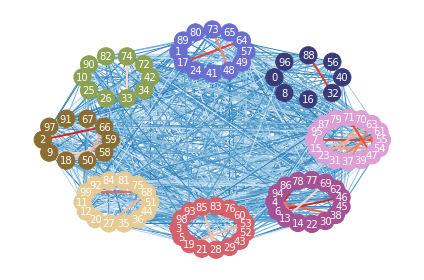

27722.186328935444

In [211]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

run(solve, 'small.in', 'small.out')

In [217]:
run_all(solve, 'inputs', 'outputs')
tar('outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large1.in: cost 184437.34038330818
inputs/large10.in: cost 153800.5487996037
inputs/large100.in: cost 622627.0562514798
inputs/large101.in: cost 149183.84247324918
inputs/large102.in: cost 250098.9004886427
inputs/large103.in: cost 317701.69481319154
inputs/large104.in: cost 933832.9643620334
inputs/large105.in: cost 1219.2493960703473
inputs/large106.in: cost 19564.940391914926
inputs/large107.in: cost 423959.77162690414
inputs/large108.in: cost 417233.79986506054
inputs/large109.in: cost 109990.02449822478
inputs/large11.in: cost 98162.25064977845
inputs/large110.in: cost 528453.0479547066
inputs/large111.in: cost 288761.6762584986
inputs/large112.in: cost 144422.33492093408
inputs/large113.in: cost 1076754.6754407906
inputs/large114.in: cost 352166.21780574846
inputs/large115.in: cost 739.905609893065
inputs/large116.in: cost 24471.515733742017
inputs/large117.in: cost 64792.31591025766
inputs/large118.in: cost 264968.7293957008
inputs/large119.in: cost 236558.17615892523
inp

inputs/large37.in: cost 91271.83358905015
inputs/large38.in: cost 64510.63291403379
inputs/large39.in: cost 20094.515195236767
inputs/large4.in: cost 3992298.277448282
inputs/large40.in: cost 184805.7926226827
inputs/large41.in: cost 449.2277266951576
inputs/large42.in: cost 64342.31591025766
inputs/large43.in: cost 417233.79986506054
inputs/large44.in: cost 15515.435142251654
inputs/large45.in: cost 26336.21103858704
inputs/large46.in: cost 417233.79986506054
inputs/large47.in: cost 1981219.2493960704
inputs/large48.in: cost 271493.5205990548
inputs/large49.in: cost 179881.49659482978
inputs/large5.in: cost 70390.16253370378
inputs/large50.in: cost 69187.88233906854
inputs/large51.in: cost 21834.953718740388
inputs/large52.in: cost 194589.8917956474
inputs/large53.in: cost 449.2277266951576
inputs/large54.in: cost 82523.88314826737
inputs/large55.in: cost 100030.59343654478
inputs/large56.in: cost 162945.2847592098
inputs/large57.in: cost 607144.1638241758
inputs/large58.in: cost 1439

inputs/medium216.in: cost 2556012.187521875
inputs/medium217.in: cost 336383.2925097437
inputs/medium218.in: cost 22874.77920465529
inputs/medium219.in: cost 381282.0650606694
inputs/medium22.in: cost 25736.360376141463
inputs/medium220.in: cost 172164.67190349958
inputs/medium221.in: cost 210926.699691438
inputs/medium222.in: cost 735805.2414456063
inputs/medium223.in: cost 462867.0381249469
inputs/medium224.in: cost 114818.45656172938
inputs/medium225.in: cost 17806.293663674853
inputs/medium226.in: cost 156141.40724840027
inputs/medium227.in: cost 739.905609893065
inputs/medium228.in: cost 46935.70364765726
inputs/medium229.in: cost 449.5598517448982
inputs/medium23.in: cost 33858.408115300634
inputs/medium230.in: cost 14921.09436607406
inputs/medium231.in: cost 16190.138466127275
inputs/medium232.in: cost 28425.392583228335
inputs/medium233.in: cost 310767.98990940966
inputs/medium234.in: cost 455715.3336506493
inputs/medium235.in: cost 43842.31591025766
inputs/medium236.in: cost 2

inputs/small152.in: cost 27722.186328935444
inputs/small153.in: cost 417665.8164039266
inputs/small154.in: cost 179219.24939607034
inputs/small155.in: cost 238228.25534133037
inputs/small156.in: cost 370732.8164039266
inputs/small157.in: cost 188093.56549573984
inputs/small158.in: cost 195220.94049462173
inputs/small159.in: cost 59890.91109705964
inputs/small16.in: cost 417665.8164039266
inputs/small160.in: cost 179219.24939607034
inputs/small161.in: cost 108698.65262512762
inputs/small162.in: cost 182667.45033576706
inputs/small163.in: cost 208398.36267347372
inputs/small164.in: cost 171932.56549573984
inputs/small165.in: cost 177290.74689167584
inputs/small166.in: cost 299888.285195059
inputs/small167.in: cost 94361.21144867258
inputs/small168.in: cost 197474.89723423866
inputs/small169.in: cost 198367.74689167584
inputs/small17.in: cost 63157.73778275406
inputs/small170.in: cost 124272.18251122553
inputs/small171.in: cost 240538.4548654419
inputs/small172.in: cost 73148.18251122553


inputs/small90.in: cost 417665.8164039266
inputs/small91.in: cost 26908.180185022913
inputs/small92.in: cost 329383.8164039266
inputs/small93.in: cost 121271.1881231363
inputs/small94.in: cost 96313.85383914743
inputs/small95.in: cost 171487.0226883295
inputs/small96.in: cost 58595.36878166566
inputs/small97.in: cost 52850.464450791966
inputs/small98.in: cost 31003.903666682025
inputs/small99.in: cost 5462.506101865805
